### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Driver Dataset
Source: https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv

In [21]:
drivers_data = pd.read_csv('dataset/driver_dataset.csv', sep='\t')

drivers_data.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [22]:
drivers_data.shape

(4000, 3)

In [23]:
drivers_data = drivers_data.sample(frac=1)

##### Dropping the ID column

In [24]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

drivers_data.sample(10)

,Distance_Feature,Speeding_Feature
2586,47.04,4.0
2823,52.60,4.0
2825,64.98,3.0
1455,36.19,2.0
1327,56.57,8.0
371,63.20,40.0
2389,54.92,2.0
3106,45.03,11.0
1746,51.67,5.0
29,56.04,39.0


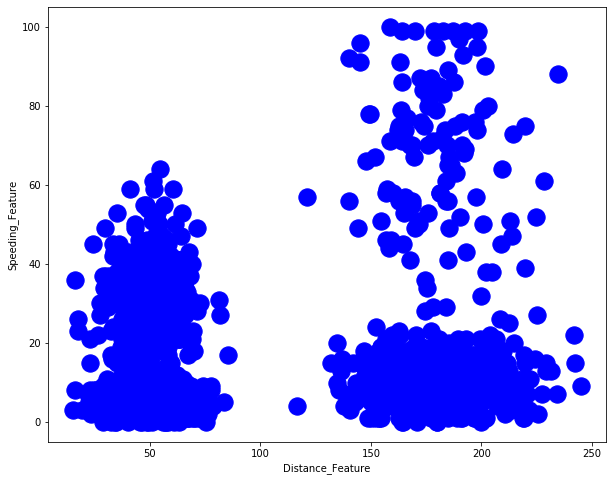

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 300, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

### Kmeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [63]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
# kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [64]:
kmeans_model.labels_[::40]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
np.unique(kmeans_model.labels_)

array([0, 1], dtype=int32)

In [66]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([42.04,  5.  ]), 0),
 (array([48.67,  3.  ]), 0),
 (array([55.28, 36.  ]), 0),
 (array([203.41,   7.  ]), 1),
 (array([34.68,  7.  ]), 0),
 (array([164.03,  86.  ]), 1),
 (array([31.62,  2.  ]), 0),
 (array([41.59,  3.  ]), 0),
 (array([41.95, 28.  ]), 0),
 (array([40.1,  4. ]), 0)]

In [67]:
centroids = kmeans_model.cluster_centers_

centroids

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

##### plotting centroids along with data points

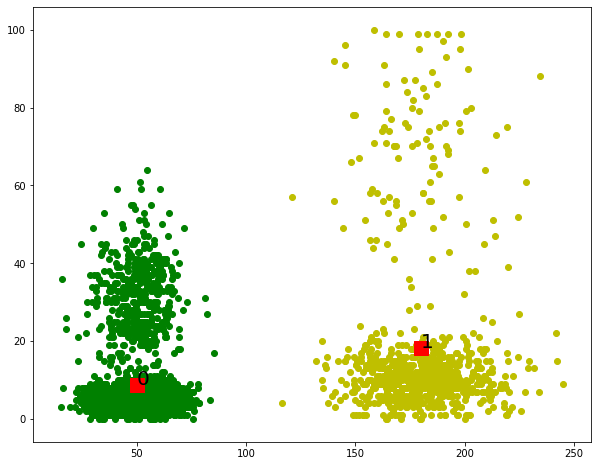

In [68]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

##### with no of clusters = 4 silhouette score decreased

In [69]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette_score:  0.8490223286225532
